In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from tensorflow.keras.models import Model 

In [ ]:
from tensorflow.keras.layers import LSTM,Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing import sequence 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
 df =pd.read_csv(r'/content/drive/MyDrive/spam.csv',encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


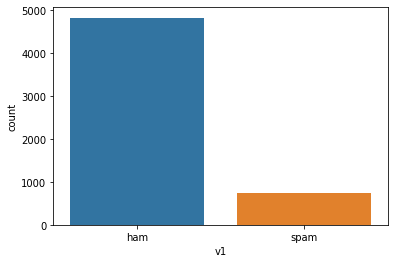

In [ ]:
sns.countplot(df.v1)

In [ ]:
X = df.v2 
Y = df.v1
le = LabelEncoder() 
Y =le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [ ]:
max_words = 1000 
max_len = 150
tok = Tokenizer(num_words=max_words) 
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train) 
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
  inputs = Input(name='inputs',shape=[max_len])
  layer = Embedding(max_words,50,input_length=max_len)(inputs)
  layer = LSTM(128)(layer) 
  layer =Dense(256,name='FC1')(layer) 
  layer =Activation('relu')(layer) 
  layer = Dropout(0.5)(layer)
  layer = Dense(1,name='out_layer')(layer) 
  layer =Activation('tanh')(layer) 
  model =Model(inputs=inputs,outputs=layer) 
  return model
model = RNN() 
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy','mse','mae'])
Model: "model"

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 128)               91648     
                                                                 
 FC1 (Dense)                 (None, 256)               33024     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
28/28 [==============================] - 19s 572ms/step - loss: 0.3005 - accuracy: 0.8945 - mse: 0.0782 - mae: 0.1575 - val_loss: 0.1175 - val_accuracy: 0.9731 - val_mse: 0.0287 - val_mae: 0.0972
Epoch 2/10
28/28 [==============================] - 17s 602ms/step - loss: 0.0893 - accuracy: 0.9823 - mse: 0.0219 - mae: 0.0942 - val_loss: 0.1243 - val_accuracy: 0.9821 - val_mse: 0.0209 - val_mae: 0.0873


In [ ]:
test_sequences = tok.texts_to_sequences(X_test) 
test_sequences_matrix =sequence.pad_sequences(test_sequences,maxlen=max_len) 
accr =model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 3s 95ms/step - loss: 0.1023 - accuracy: 0.9821 - mse: 0.0212 - mae: 0.0889


In [ ]:
print('Test set\n Loss: {:0.3f}\n Accuracy:{:0.3f}'.format(accr[0],accr[1]))

Test set
 Loss: 0.102
 Accuracy:0.982


In [ ]:
model.save("./assign4model.h5")

In [ ]:
from tensorflow.keras.models import load_model 
m2 = load_model("./assign4model.h5")
m2.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 3s 75ms/step - loss: 0.1023 - accuracy: 0.9821 - mse: 0.0212 - mae: 0.0889


[0.10231727361679077,
 0.9820627570152283,
 0.0211905799806118,
 0.08892768621444702]